In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [2]:
df= pd.read_csv(r"/Users/vierka/Desktop/toxic_comment/data/train.csv")

In [3]:
comment = df['comment_text']
print(comment.head())
comment=comment.values

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


In [4]:
bins = [1,300,500,700,900,1100,1300]
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head())
label = label.values

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


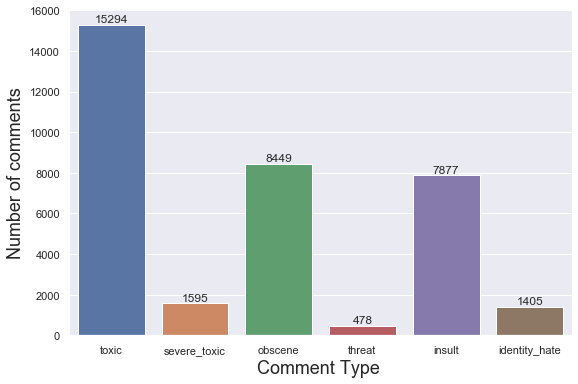

None

In [5]:
x=df.iloc[:,2:].sum()
xx=df.iloc[:,2:]
len(xx)
#print(x.index)
sns.set(font_scale = 1)
plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values)
#plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

display(plt.show())

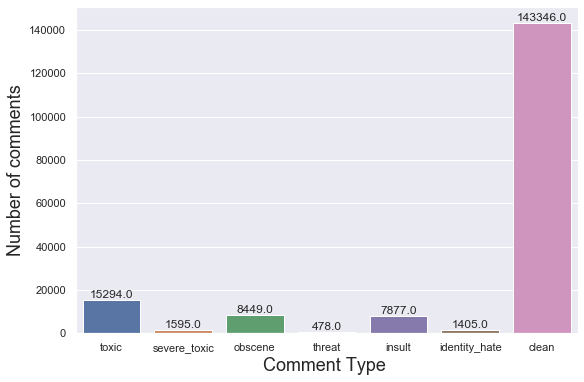

None

In [6]:
df.loc[(df['toxic'].values + df['severe_toxic'].values + df['obscene'].values+ df['threat'].values+ df['insult'].values+ df['identity_hate'].values) == 0, 'clean'] = 1
df.loc[(df['toxic'].values + df['severe_toxic'].values + df['obscene'].values+ df['threat'].values+ df['insult'].values+ df['identity_hate'].values) >= 1, 'clean'] = 0
x=df.iloc[:,2:].sum()
xx=df.iloc[:,2:]
len(xx)
#print(x.index)
sns.set(font_scale = 1)
plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values)
#plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

display(plt.show())

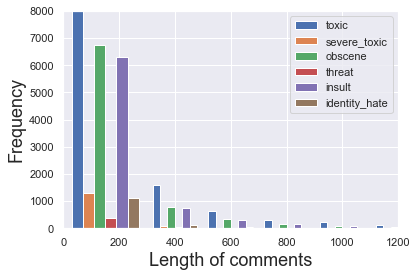

In [7]:
label = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
label = label.values
y = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l
    if label[ix][5] :
        y[ix][5] = l

labelsplt = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
color = ['red','green','blue','yellow','orange','chartreuse']        
plt.hist(y,bins=bins,label = labelsplt)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments',fontsize=18)
plt.ylabel('Frequency',fontsize=18) 
plt.legend()
plt.show()

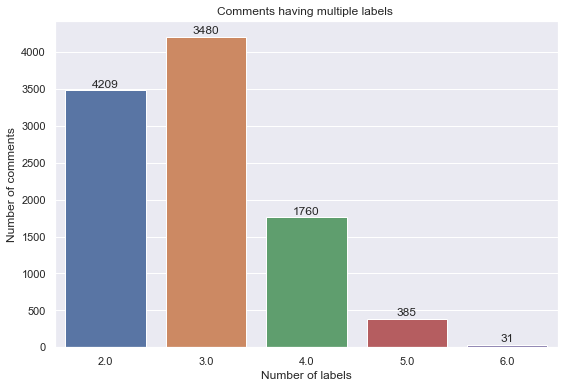

In [8]:
rowSums = df.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
plt.figure(figsize=(9,6))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments')
plt.xlabel('Number of labels')
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

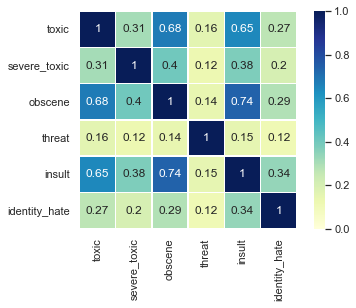

In [9]:
label = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

colormap = plt.cm.plasma
sns.heatmap(label.astype(float).corr(),annot=True, linewidths=.5, cmap="YlGnBu",  vmin=0, vmax=1, square=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!